# Simulation of Prices of Coupon-Bearing Bonds using CIR

In [39]:
from sys import path 
path.append('../')
import edhec_risk_kit as erk 

import pandas as pd 
import numpy as np 

import ipywidgets as widgets
from IPython.display import display

%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
erk.bond_price(5, 100, .05, 12, .03)

0    109.275393
dtype: float64

In [41]:
rates, zc_prices = erk.cir(10, 500, b=0.03, r_0=0.03)

In [42]:
erk.bond_price(5, 100, .05, 12, rates.iloc[0][[1,2,3]])

1    109.275393
2    109.275393
3    109.275393
dtype: float64

In [43]:
erk.bond_price(5, 100, .05, 12, rates.iloc[1][[1,2,3]])

1    109.698348
2    107.701628
3    108.161724
dtype: float64

In [44]:
rates[[1,2,3]].head()

,1,2,3
0,0.030000,0.030000,0.030000
1,0.029133,0.033259,0.032301
2,0.032104,0.036397,0.033543
3,0.030460,0.030809,0.034880
4,0.029343,0.030135,0.032950


<Axes: >

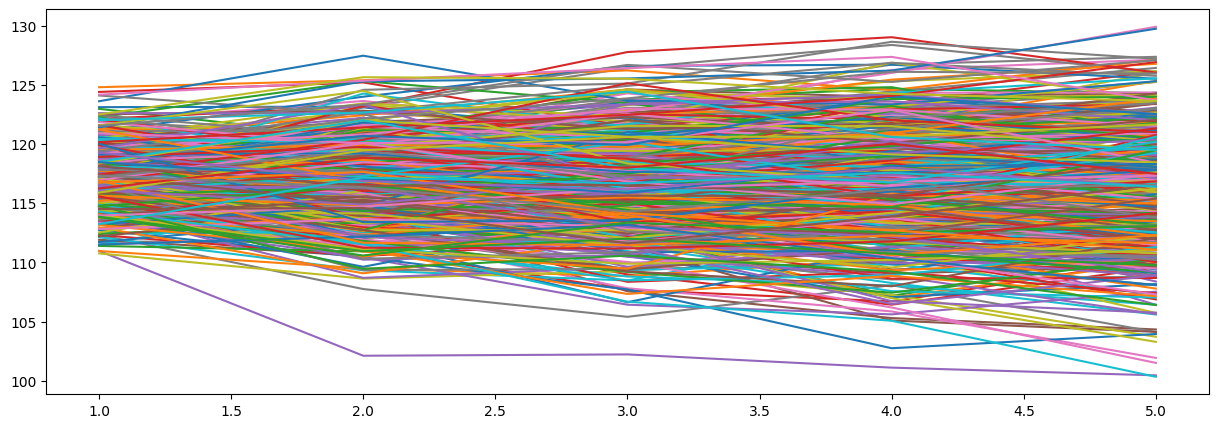

In [45]:
erk.bond_price(10, 100, .05, 12, rates.iloc[[1,2,3,4,5]]).plot(legend=False, figsize=(15,5))

In [46]:
prices = erk.bond_price(10, 100, .05, 12, rates.iloc[[1,2,3,4,5]])

In [47]:
# will see this method of percent change will show negative numbers 
# this is only showing the price return and not the total return (value you get not just from the price, but the value of the coupon)
br = prices.pct_change().dropna()
erk.annualize_rets(br, 12)

0     -0.116231
1     -0.060540
2      0.030554
3     -0.062508
4     -0.258105
         ...   
495    0.054672
496   -0.011613
497   -0.019931
498    0.028094
499    0.086011
Length: 500, dtype: float64

In [48]:
p = erk.bond_price(10, 100, 0.05, 12, rates[[1,2,3,4]])
btr = erk.bond_total_return(p, 100, .05, 12)  # bond total coupon 
erk.annualize_rets(btr, 12)

1     0.02922
2     0.03692
3    0.035414
4    0.031072
dtype: object

In [49]:

# all converge on the last row 
price_10 = erk.bond_price(10, 100, .05, 12, rates)
price_10.tail()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
116,100.407418,100.805021,97.409316,98.906487,101.018342,100.961366,101.124731,101.285017,100.561855,100.400586,...,101.057515,100.230129,100.992906,101.167491,99.161787,100.590313,99.485947,101.31173,101.007252,100.220526
117,100.234677,100.608423,97.874971,99.222542,100.778981,100.736512,100.814209,100.934938,100.385882,100.206106,...,100.742812,100.024813,100.793663,100.916955,99.309425,100.43951,99.56896,100.909059,100.751968,100.275051
118,100.100675,100.360485,98.611774,99.464134,100.535983,100.514061,100.550273,100.619981,100.315651,100.087877,...,100.457935,100.131289,100.538251,100.611357,99.606176,100.281517,99.77528,100.5986,100.498478,100.172048
119,100.071871,100.175229,99.240001,99.794775,100.267408,100.230995,100.255858,100.308753,100.188165,100.01977,...,100.227706,100.02452,100.277902,100.29364,99.765325,100.137427,99.921131,100.316309,100.222962,100.093614
120,100.416667,100.416667,100.416667,100.416667,100.416667,100.416667,100.416667,100.416667,100.416667,100.416667,...,100.416667,100.416667,100.416667,100.416667,100.416667,100.416667,100.416667,100.416667,100.416667,100.416667


In [50]:
# don't converge, because you still have years to go 
price_30 = erk.bond_price(30, 100, .05, 12, rates)
price_30.tail()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
116,117.478886,138.413376,42.961492,67.358924,151.539736,147.890923,158.648376,170.128979,125.108325,117.15507,...,154.111619,109.428777,149.897493,161.61801,73.499795,126.581082,82.475013,172.137288,150.821051,109.013055
117,113.038826,138.603933,40.538466,68.794695,152.634828,148.985082,155.74479,166.998594,122.60401,111.339008,...,149.519784,101.283486,153.921771,165.261809,71.55193,126.239845,80.769098,164.506065,150.300963,115.49763
118,108.115985,133.327118,41.340343,68.12298,154.593237,151.720553,156.501517,166.229028,128.484884,107.038063,...,144.65704,110.751899,154.894269,164.986886,75.023533,124.944892,84.576109,163.169696,149.717918,114.390649
119,111.794441,132.080492,38.928514,74.277262,154.199209,144.953297,151.190284,165.585338,134.935888,103.07607,...,144.152164,103.833468,156.99671,161.308576,71.360097,124.159275,88.869085,167.774703,143.006134,115.713931
120,107.625941,143.765217,41.147376,73.021677,156.69534,145.182089,151.713525,166.250414,133.339407,100.835122,...,145.940459,109.272561,155.447786,156.45455,70.777756,128.51567,87.423092,167.436456,137.281273,111.672192


In [51]:
rets_30 = erk.bond_total_return(price_30, 100, 0.05, 12)
rets_10 = erk.bond_total_return(price_10, 100, 0.05, 12)
rets_bonds = .6*rets_10 + .4*rets_30  # assume balance 60/40 if you re-balance at end of the month 

In [52]:
mean_rets_bonds = rets_bonds.mean(axis='columns')
erk.summary_stats(pd.DataFrame(mean_rets_bonds))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.035512,0.003972,0.342648,3.437975,-0.001158,-0.000669,1.350412,0.0


In [53]:
price_eq = erk.gbm(n_years=10, n_scenarios=500, mu=0.07, sigma=0.015)
price_eq.shape

(121, 500)

In [54]:
rets_eq = price_eq.pct_change().dropna()
rets_eq.shape

(120, 500)

In [55]:
rets_bonds.shape

(120, 500)

In [56]:
rets = .7* rets_eq + .3*rets_bonds
rets_mean = rets.mean(axis='columns')
erk.summary_stats(pd.DataFrame(rets_mean))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.059388,0.00131,0.144564,2.89137,-0.004215,-0.004096,21.830111,0.0
